**Q1: Identify missing or incorrect data in the dataset and apply appropriate preprocessing steps to clean it (code and explanation)**

In [ ]:
import pandas as pd
import numpy as np

# Create DataFrame (replace 'data.csv' with your file path if available as a CSV)
data = pd.read_csv("/content/dataset.csv")

# Display initial data
print("Initial Data Overview:")
print(data.info())
print("\nMissing Values Count:\n", data.isnull().sum())

# Step 1: Identify Missing Values
missing_columns = data.columns[data.isnull().any()]
print(f"\nColumns with Missing Values: {missing_columns}")

# Step 2: Handle Missing Data
# For numerical columns, use mean or median imputation
for col in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']:
    data[col].fillna(data[col].mean(), inplace=True)

# For categorical columns, use mode imputation
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

# Verify data types
print("\nData Types:\n", data.dtypes)



# Verify cleaned data
print("\nCleaned Data Overview:")
print(data.info())
print("\nMissing Values After Cleaning:\n", data.isnull().sum())
print("\nSample Cleaned Data:\n", data.head())

# Export cleaned data for further use
data.to_csv("cleaned_penguin_data.csv", index=False)


Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     337 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                328 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

Missing Values Count:
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64

Columns with Missing Values: Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'sex'],
      dtype='object')

Data Types:
 species            

<ipython-input-1-a254237a2819>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)
<ipython-input-1-a254237a2819>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

# **Handling Missing Values**
1. For Numerical Columns:
Columns Affected: Columns like bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g typically contain numerical data.
Imputation Method: Use the mean of the column to fill in the missing values.
This assumes the missing values are randomly distributed and that the mean is a good representation of the data's central tendency.

For missing values in the dataset, I am taking the following actions depending on the column type and context:

Handling Missing Values
1. For Numerical Columns:
Columns Affected: Columns like bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g typically contain numerical data.
Imputation Method: Use the mean of the column to fill in the missing values.


2. For Categorical Columns:
Columns Affected: Columns like sex (categorical) may have missing values.
Imputation Method: Use the mode (most frequent value) of the column to fill in the missing values.

**Q2: What is the average body_mass_g for Gentoo penguins? (code)**

In [ ]:
import pandas as pd

# Load the cleaned dataset
cleaned_data_path = "/content/cleaned_penguin_data.csv"  # Replace with your cleaned CSV file path
cleaned_data = pd.read_csv(cleaned_data_path)

# Ensure no missing values exist in the relevant column
cleaned_data['body_mass_g'].dropna(inplace=True)

# Filter the dataset for Gentoo species
gentoo_penguins = cleaned_data[cleaned_data['species'] == 'Gentoo']

# Calculate the average body_mass_g for Gentoo penguins
average_body_mass = gentoo_penguins['body_mass_g'].mean()

print(f"The average body mass for Gentoo penguins is: {average_body_mass:.2f} g")


The average body mass for Gentoo penguins is: 5126.81 g


**Q3: How do the distributions of bill_length_mm and bill_depth_mm differ between the three penguin species? Analyze the skewness and kurtosis of each feature for different species. (code and explanation)**

In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load the cleaned dataset
cleaned_data_path = "/content/cleaned_penguin_data.csv"  # Replace with your cleaned CSV file path
df = pd.read_csv(cleaned_data_path)

# Features to analyze
features = ['bill_length_mm', 'bill_depth_mm']

# Group by species and calculate skewness and kurtosis
results = {}
for feature in features:
    results[feature] = {}
    for species in df['species'].unique():
        species_data = df[df['species'] == species][feature].dropna()
        species_skewness = skew(species_data)
        species_kurtosis = kurtosis(species_data)
        results[feature][species] = {
            'Skewness': species_skewness,
            'Kurtosis': species_kurtosis
        }

# Display the results
for feature, species_stats in results.items():
    print(f"\nFeature: {feature}")
    for species, stats in species_stats.items():
        print(f"  Species: {species}")
        print(f"    Skewness: {stats['Skewness']:.2f}")
        print(f"    Kurtosis: {stats['Kurtosis']:.2f}")



Feature: bill_length_mm
  Species: Adelie
    Skewness: 0.16
    Kurtosis: -0.23
  Species: Gentoo
    Skewness: 0.71
    Kurtosis: 1.15
  Species: Chinstrap
    Skewness: -0.10
    Kurtosis: -0.12

Feature: bill_depth_mm
  Species: Adelie
    Skewness: 0.33
    Kurtosis: -0.10
  Species: Gentoo
    Skewness: 0.33
    Kurtosis: -0.61
  Species: Chinstrap
    Skewness: 0.01
    Kurtosis: -0.90


# **Explanation**
**Load Cleaned Dataset:**
Ensure you use the cleaned dataset to avoid missing values interfering with calculations.

**Select Features:**
We analyze bill_length_mm and bill_depth_mm as specified.

**Group Data by Species:**
For each species in the species column, filter the relevant feature and compute skewness and kurtosis.

**Calculate Skewness and Kurtosis:**

Skewness: Measures the asymmetry of the distribution. Positive skewness indicates a longer right tail, while negative skewness indicates a longer left tail.
Kurtosis: Measures the "tailedness" of the distribution. High kurtosis indicates heavy tails, while low kurtosis indicates light tails compared to a normal distribution.
**Print Results:**
For each feature and species, the skewness and kurtosis are displayed.



**Q4: Identify which features in the dataset have outliers. Provide the method used to detect them and visualize the outliers. (code and explanation)**

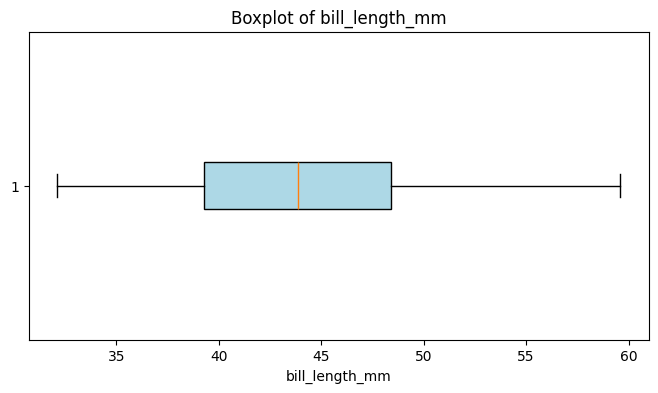

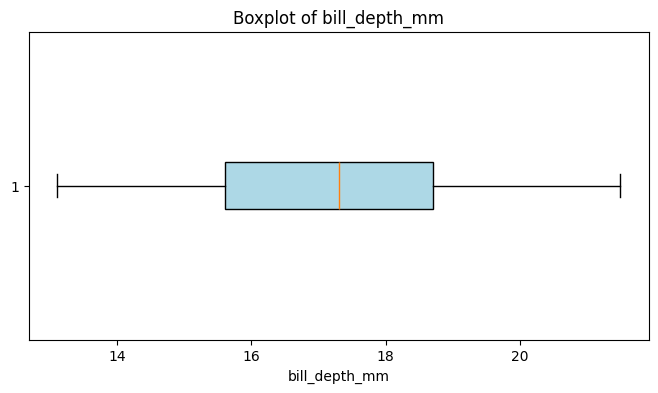

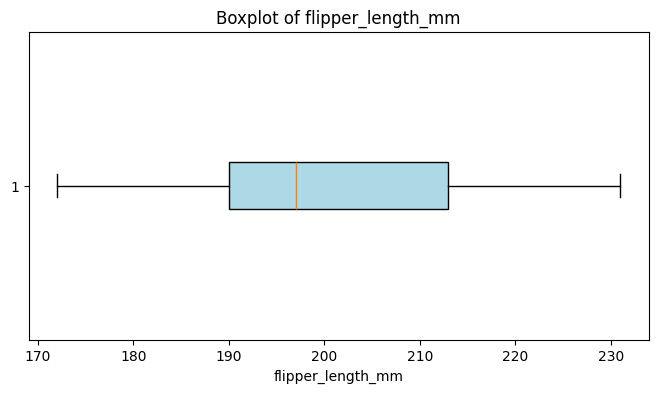

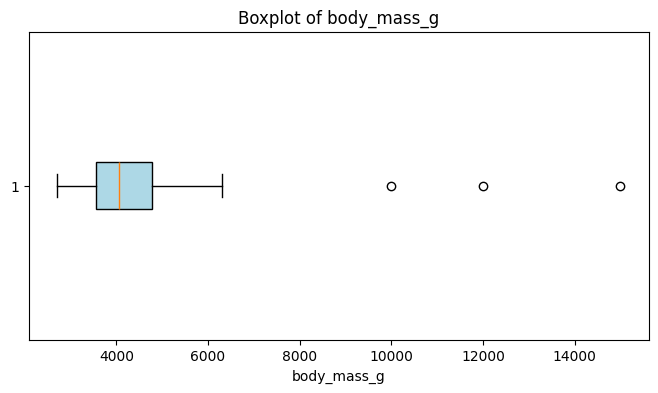


Feature: bill_length_mm
  Outlier Count: 0
  Lower Bound: 25.59
  Upper Bound: 62.09

Feature: bill_depth_mm
  Outlier Count: 0
  Lower Bound: 10.95
  Upper Bound: 23.35

Feature: flipper_length_mm
  Outlier Count: 0
  Lower Bound: 155.50
  Upper Bound: 247.50

Feature: body_mass_g
  Outlier Count: 3
  Lower Bound: 1703.12
  Upper Bound: 6628.12


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
cleaned_data_path = "/content/cleaned_penguin_data.csv"  # Replace with your cleaned CSV file path
df = pd.read_csv(cleaned_data_path)

# Identify numerical features to analyze for outliers
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Function to calculate outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Dictionary to store outlier results
outlier_results = {}

# Detect outliers for each numerical feature
for feature in numerical_features:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, feature)
    outlier_results[feature] = {
        'Count': len(outliers),
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound
    }

    # Visualize the feature with a boxplot
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[feature].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

# Display outlier results
for feature, stats in outlier_results.items():
    print(f"\nFeature: {feature}")
    print(f"  Outlier Count: {stats['Count']}")
    print(f"  Lower Bound: {stats['Lower Bound']:.2f}")
    print(f"  Upper Bound: {stats['Upper Bound']:.2f}")


# **Analysis and Explanation**
**bill_length_mm, bill_depth_mm, and flipper_length_mm:**

The absence of outliers in these features indicates a robust distribution, with all measurements within the normal range defined by the interquartile range (IQR) method.
These features do not require further action for outlier handling.

**body_mass_g:**

The presence of three outliers suggests potential extreme cases, such as:
Penguins with unusually low body mass (possibly juvenile or malnourished).
Penguins with exceptionally high body mass (potentially different species or measurement anomalies).
These outliers might influence statistical analyses or machine learning models.

**Q5: Does this dataset contribute to the curse of dimensionality? If yes perform PCA. (code and explanation required)**

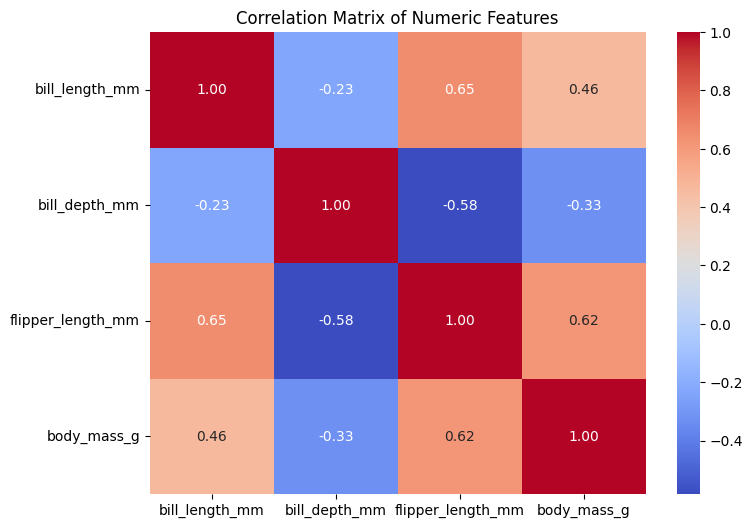


Feature Variances:
bill_length_mm: 29.4025
bill_depth_mm: 3.8771
flipper_length_mm: 196.5788
body_mass_g: 1245370.6758


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cleaned_penguin_data.csv'
data = pd.read_csv(file_path)

# Select numeric features
numeric_data = data.select_dtypes(include=['float64'])

# 1. Correlation Matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap for correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# 2. Variance Calculation
variances = numeric_data.var()

# Print variance values
print("\nFeature Variances:")
for feature, var in variances.items():
    print(f"{feature}: {var:.4f}")


**Unequal Variance:**
The variances of the features differ significantly:

bill_length_mm: 29.4025

bill_depth_mm: 3.8771

flipper_length_mm: 196.5788

body_mass_g: 1,245,370.6758

**Observation:**
The variance of body_mass_g is extremely large compared to the other features (e.g., over 42,000 times larger than bill_depth_mm). This unequal variance can lead to:

Features with high variance dominating the analysis.
Features with low variance contributing less to algorithms, even if they are important.
**High Correlation:**
There are strong correlations among certain features, such as:

bill_length_mm and flipper_length_mm (
𝑟
=
0.65
r=0.65)

flipper_length_mm and body_mass_g (
𝑟
=
0.62
r=0.62)

Observation:
These correlations suggest redundancy, as some features capture similar information. High correlation increases the dimensionality problem by introducing overlapping information in the dataset.

**Curse of Dimensionality:**
The dataset exhibits signs of the curse of dimensionality due to:

Unequal variances, which distort feature importance in analysis.
High correlations, leading to redundancy among features.
Solution:
To address these issues, PCA can be applied to:

Remove redundancy caused by correlated features.
Balance feature contributions by reducing them to uncorrelated principal components.

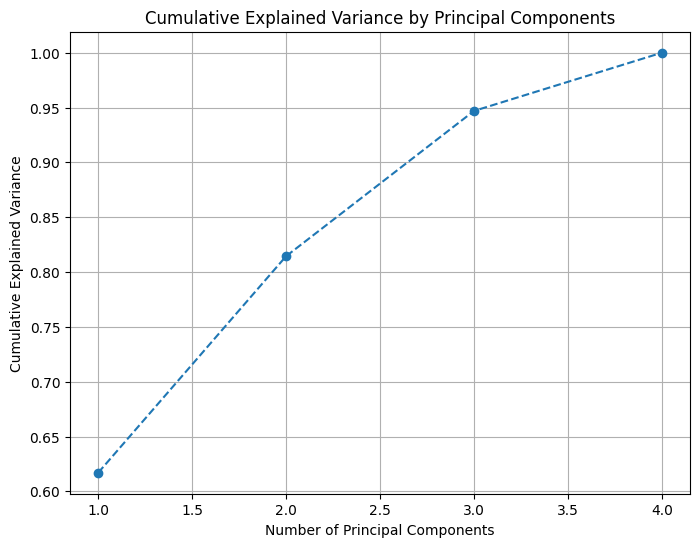


Principal Component Data:
            PC1           PC2           PC3
0 -1.826395e+00  1.329330e-01  3.918734e-01
1 -1.280662e+00 -3.734830e-01  2.581225e-01
2 -1.202863e+00 -1.906579e-01 -2.588396e-01
3 -4.425842e-16 -2.636658e-16  3.509275e-16
4 -1.796753e+00  4.697583e-02  3.654760e-01

Variance retained with 3 components: 94.69%


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cleaned_penguin_data.csv'
data = pd.read_csv(file_path)

# Select numeric features
numeric_data = data.select_dtypes(include=['float64'])

# Standardize the numeric features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Transform data to the top 2-3 principal components
n_components = 3  # Adjust based on variance retention
pca = PCA(n_components=n_components)
pca_reduced_data = pca.fit_transform(scaled_data)

# Convert PCA results to a DataFrame for analysis
pca_columns = [f"PC{i+1}" for i in range(n_components)]
pca_df = pd.DataFrame(pca_reduced_data, columns=pca_columns)

# Display results
print("\nPrincipal Component Data:")
print(pca_df.head())

# Explain variance retained
variance_retained = explained_variance_ratio[:n_components].sum() * 100
print(f"\nVariance retained with {n_components} components: {variance_retained:.2f}%")


**Q6: Use bill_length_mm vs bill_depth_mm and plot 7 different graphs to visualize them.**

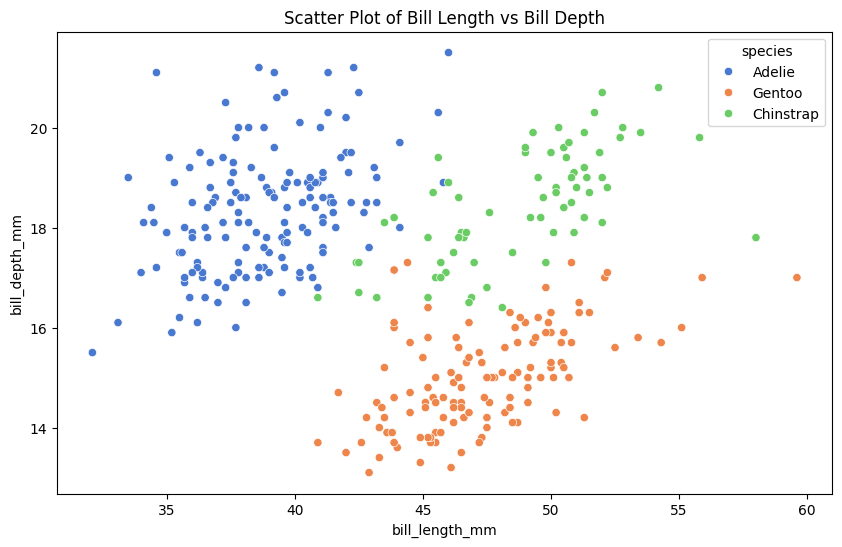

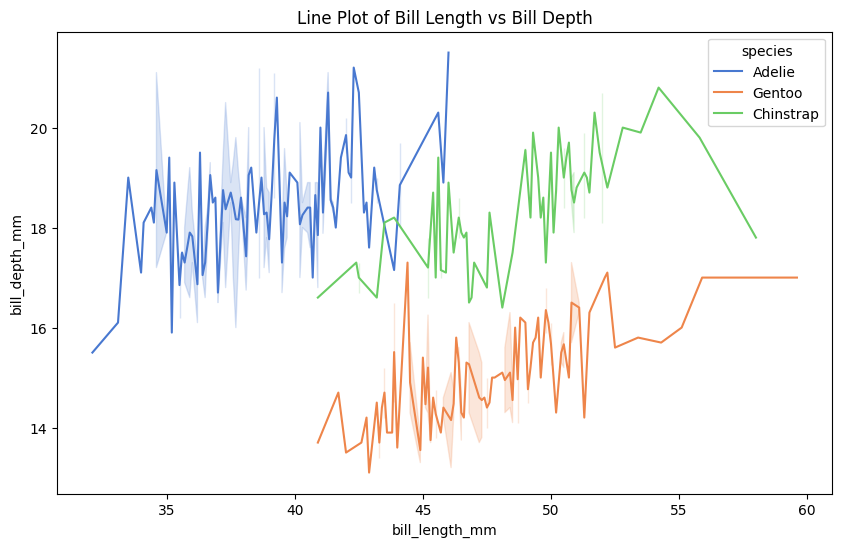

<ipython-input-15-ede3ec3242de>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins_data, x='species', y='bill_depth_mm', palette='muted')


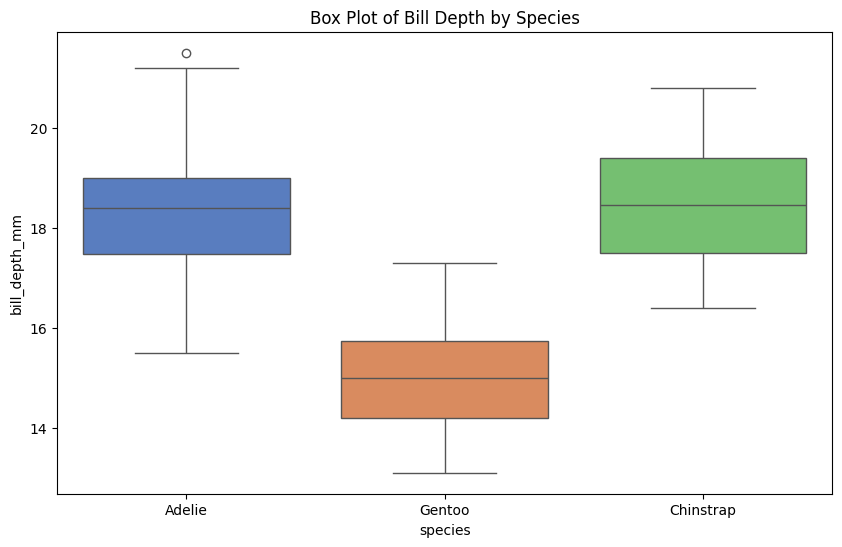

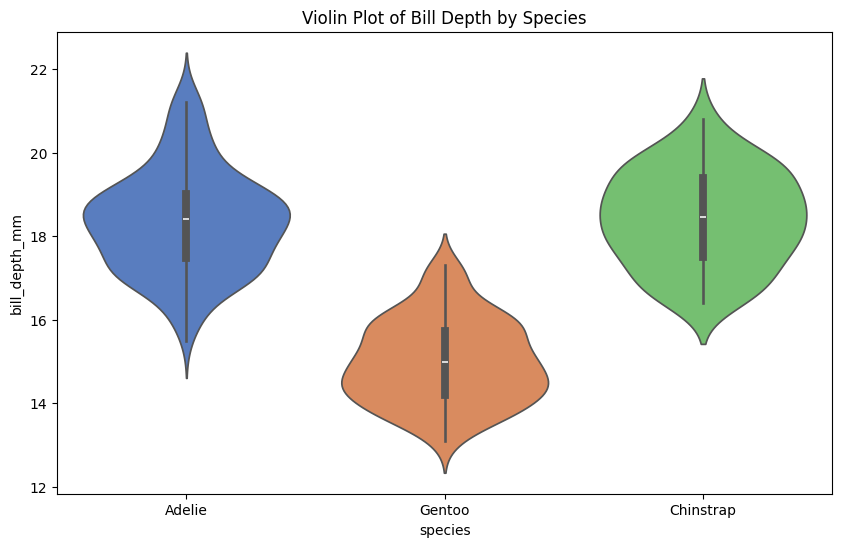

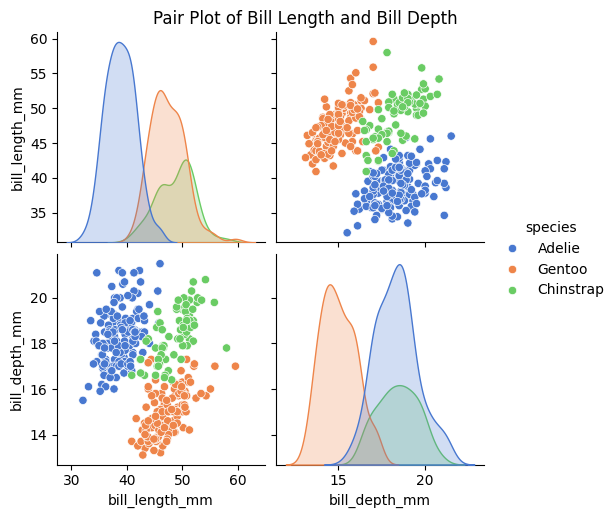

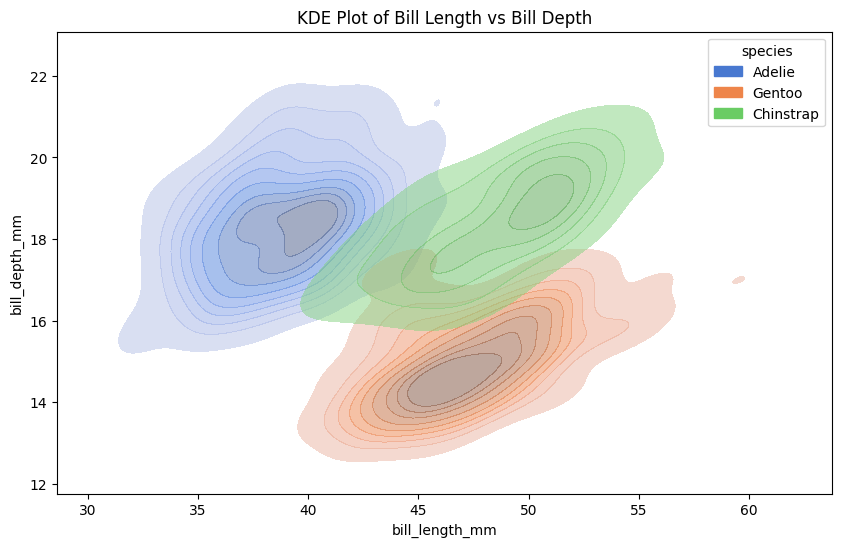

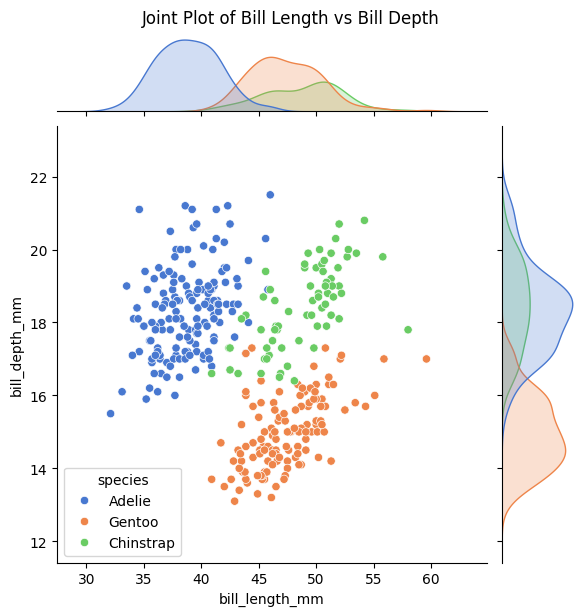

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the cleaned CSV file
csv_path = "/content/cleaned_penguin_data.csv"  # Replace with the actual path to your CSV file
penguins_data = pd.read_csv(csv_path)

# 1. Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='muted')
plt.title("Scatter Plot of Bill Length vs Bill Depth")
plt.show()

# 2. Line Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', palette='muted')
plt.title("Line Plot of Bill Length vs Bill Depth")
plt.show()

# 3. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_data, x='species', y='bill_depth_mm', palette='muted')
plt.title("Box Plot of Bill Depth by Species")
plt.show()

# 4. Violin Plot (Corrected to avoid warning)
plt.figure(figsize=(10, 6))
sns.violinplot(data=penguins_data, x='species', y='bill_depth_mm', hue='species', dodge=False, palette='muted', legend=False)
plt.title("Violin Plot of Bill Depth by Species")
plt.show()

# 5. Pair Plot
sns.pairplot(penguins_data, hue='species', vars=['bill_length_mm', 'bill_depth_mm'], palette='muted')
plt.suptitle("Pair Plot of Bill Length and Bill Depth", y=1.02)
plt.show()

# 6. KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', fill=True, alpha=0.5, palette='muted')
plt.title("KDE Plot of Bill Length vs Bill Depth")
plt.show()

# 7. Joint Plot
sns.jointplot(data=penguins_data, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='scatter', palette='muted')
plt.suptitle("Joint Plot of Bill Length vs Bill Depth", y=1.02)
plt.show()



**Q7: Find the maximum flipper_length_mm for each combination of species and island. Which species has the longest flippers on each island? (code)**

In [ ]:
import pandas as pd

# Read the cleaned dataset
csv_path = "/content/cleaned_penguin_data.csv"  # Replace with the actual path to your cleaned CSV file
penguins_data = pd.read_csv(csv_path)

# Group by species and island, then find the maximum flipper_length_mm
max_flipper_by_group = penguins_data.groupby(['island', 'species'])['flipper_length_mm'].max().reset_index()

# Find the species with the longest flipper length for each island
longest_flipper_by_island = max_flipper_by_group.loc[max_flipper_by_group.groupby('island')['flipper_length_mm'].idxmax()]

# Print the results
print("Maximum flipper length for each species and island:")
print(max_flipper_by_group)

print("\nSpecies with the longest flippers on each island:")
print(longest_flipper_by_island)


Maximum flipper length for each species and island:
      island    species  flipper_length_mm
0     Biscoe     Adelie              203.0
1     Biscoe     Gentoo              231.0
2      Dream     Adelie              208.0
3      Dream  Chinstrap              212.0
4  Torgersen     Adelie              210.0

Species with the longest flippers on each island:
      island    species  flipper_length_mm
1     Biscoe     Gentoo              231.0
3      Dream  Chinstrap              212.0
4  Torgersen     Adelie              210.0


**Q8: Perform z-score normalization on this dataset.**

In [ ]:
import pandas as pd
from scipy.stats import zscore

# Read the cleaned dataset
csv_path = "/content/cleaned_penguin_data.csv"  # Replace with the actual path to your cleaned CSV file
penguins_data = pd.read_csv(csv_path)

# Select numerical columns for normalization
numerical_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Apply Z-score normalization
normalized_data = penguins_data.copy()
normalized_data[numerical_columns] = penguins_data[numerical_columns].apply(zscore)

# Save the normalized dataset to a new CSV (optional)
normalized_csv_path = "normalized_penguins.csv"
normalized_data.to_csv(normalized_csv_path, index=False)

# Display the normalized dataset
print(normalized_data.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.882230       0.787743      -1.422488e+00   
1  Adelie  Torgersen       -0.808355       0.126556      -1.065352e+00   
2  Adelie  Torgersen       -0.660604       0.431719      -4.225067e-01   
3  Adelie  Torgersen        0.000000       0.000000      -2.030084e-15   
4  Adelie  Torgersen       -1.325483       1.092905      -5.653611e-01   

   body_mass_g     sex  
0    -0.470213    male  
1    -0.425343  female  
2    -0.918910  female  
3     0.000000    male  
4    -0.739431  female  
